<a href="https://colab.research.google.com/github/SRAVS2003/HR-Analytics-Employee-Performance/blob/main/HR_Analytics_Performance_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<ipython-input-4-9c19b740230d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


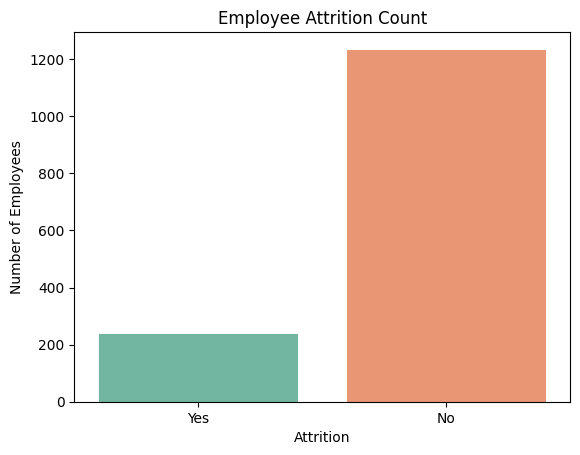

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()


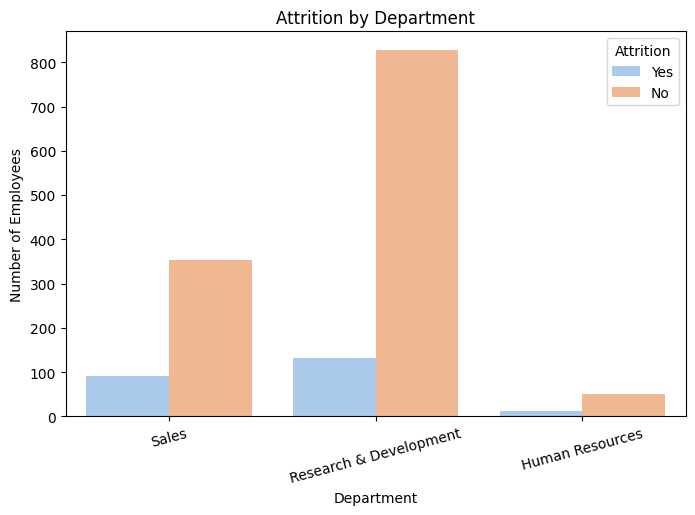

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department', hue='Attrition', palette='pastel')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=15)
plt.show()


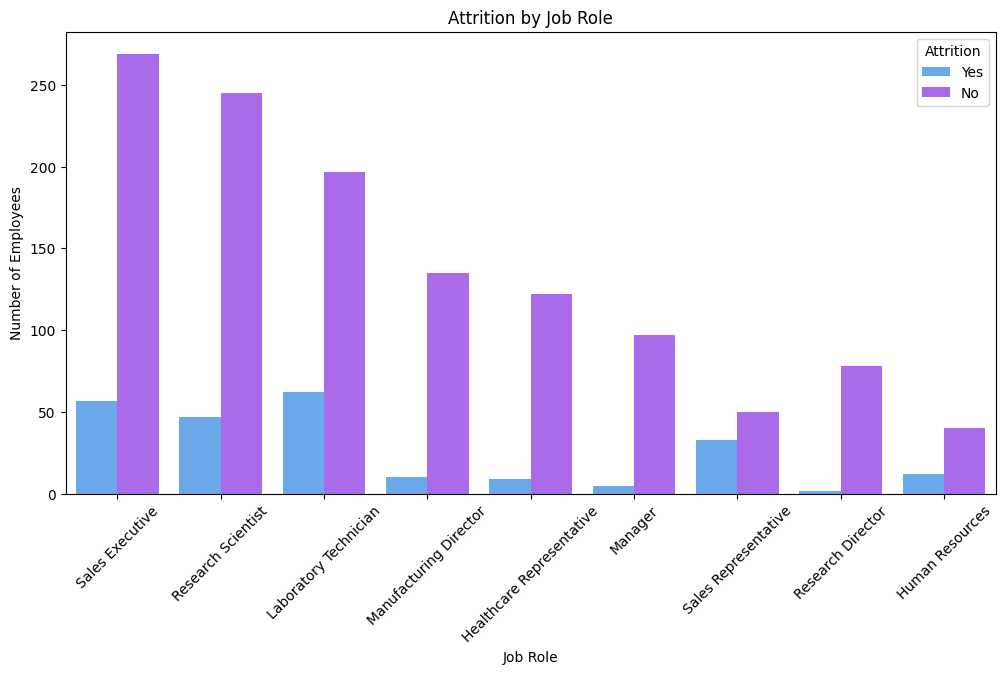

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='cool')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


<ipython-input-7-27362670800e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set1')


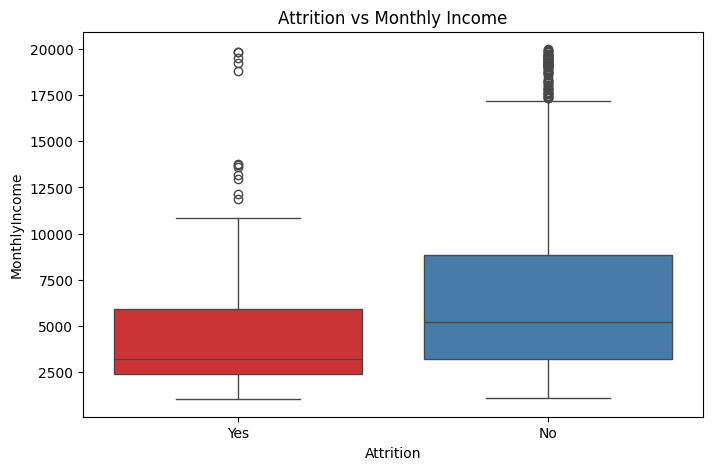

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set1')
plt.title('Attrition vs Monthly Income')
plt.show()


<ipython-input-8-d8ecab28fb35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='Set2')


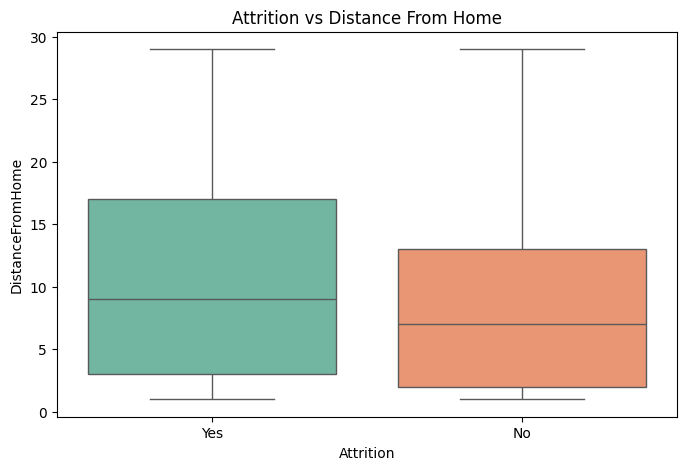

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='Set2')
plt.title('Attrition vs Distance From Home')
plt.show()


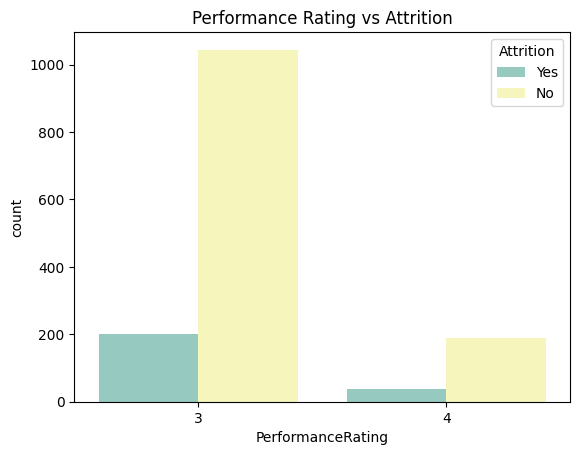

In [9]:
sns.countplot(data=df, x='PerformanceRating', hue='Attrition', palette='Set3')
plt.title('Performance Rating vs Attrition')
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

# Encode all object-type (categorical) columns
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [11]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Detailed performance
print(classification_report(y_test, y_pred))


Model Accuracy: 0.7789115646258503
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.20      0.23      0.22        39

    accuracy                           0.78       294
   macro avg       0.54      0.55      0.54       294
weighted avg       0.79      0.78      0.78       294



<ipython-input-14-a13830700f59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_features, y=important_features.index, palette='viridis')


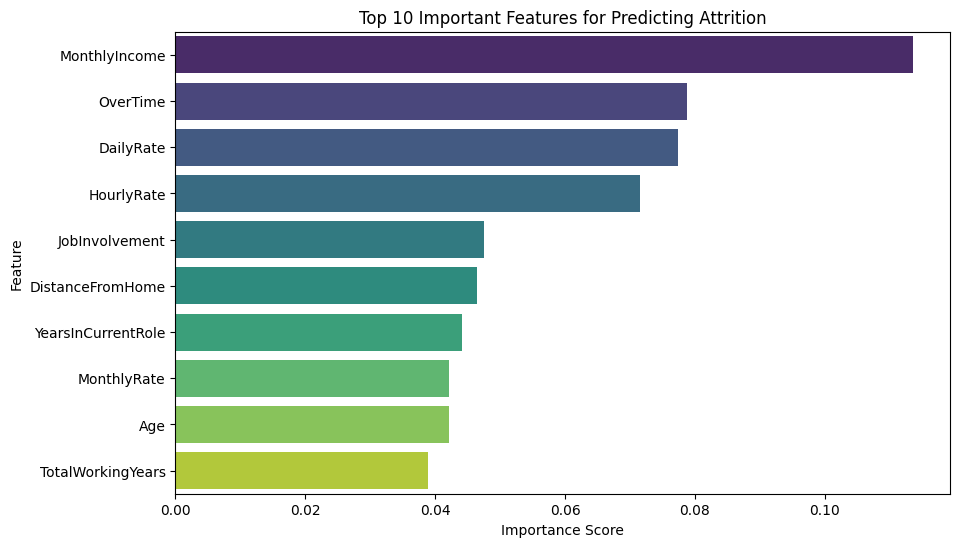

In [14]:
import pandas as pd
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(x=important_features, y=important_features.index, palette='viridis')
plt.title('Top 10 Important Features for Predicting Attrition')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [15]:
import pickle

with open('hr_attrition_model.pkl', 'wb') as file:
    pickle.dump(model, file)
